In [1]:
import os
os.chdir("..")

import torch
import numpy as np

import matplotlib.pyplot as plt
from tqdm import tqdm
import time

plt.rcParams["font.family"] = "serif"

from src.tempering.sampler import Sampler

In [2]:
device = torch.device('cuda')
dtype = torch.float16

In [3]:
L = 1_000
N = 3

beta_crit = np.log(1 + np.sqrt(2)) / 2
beta = torch.tensor([beta_crit * 0.95, 0.97 * beta_crit, beta_crit * 0.99], dtype=dtype, device=device).view(-1, 1, 1, 1)

sampler = Sampler(N, L, beta, dtype=dtype, device=device)

for _ in tqdm(range(1_000)):
    sampler.step()
torch.cuda.synchronize()

100%|██████████| 1000/1000 [00:00<00:00, 2821.06it/s]


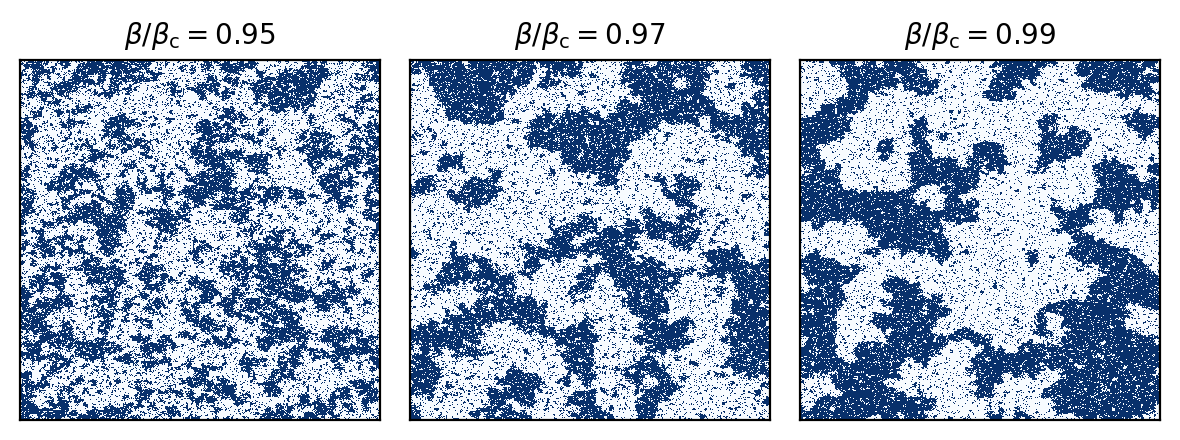

In [4]:
state = sampler.joined_state

titles = [r'$\beta/\beta_\mathrm{c} = 0.95$', r'$\beta/\beta_\mathrm{c} = 0.97$', r'$\beta/\beta_\mathrm{c} = 0.99$']
fig, axs = plt.subplots(1, 3, figsize=(6,3), dpi=200)
for (j, ax) in enumerate(axs):
    ax.matshow(state[j, 0].cpu().numpy(), cmap='Blues')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(titles[j], size=10)
plt.tight_layout()
plt.show()